**Business Objective:**

Generate the features from the dataset and use them to recommend the books accordingly to the users.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Working on Rating dataset

In [4]:
df = pd.read_csv('Ratings.csv', encoding='latin-1')
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [5]:
df.shape

(1149780, 3)

In [6]:
df.dtypes

,0
User-ID,int64
ISBN,object
Book-Rating,int64


In [7]:
df.mode()

,User-ID,ISBN,Book-Rating
0,11676,0971880107,0


In [8]:
df[["User-ID","Book-Rating"]].median()

,0
User-ID,141010.0
Book-Rating,0.0


In [9]:
df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


In [12]:
df.fillna(0,inplace=True)
df

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [13]:
df.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11


In [14]:
df.duplicated().sum()

0

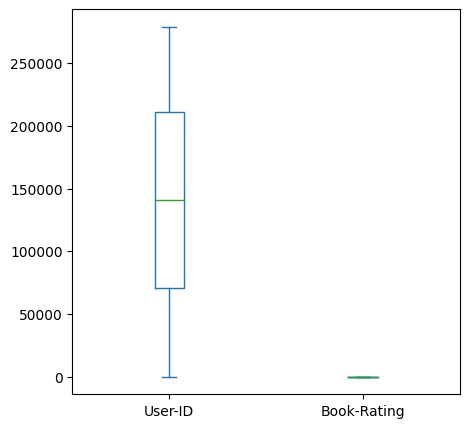

In [15]:
df.plot(kind='box',figsize=(5,5))
plt.show()

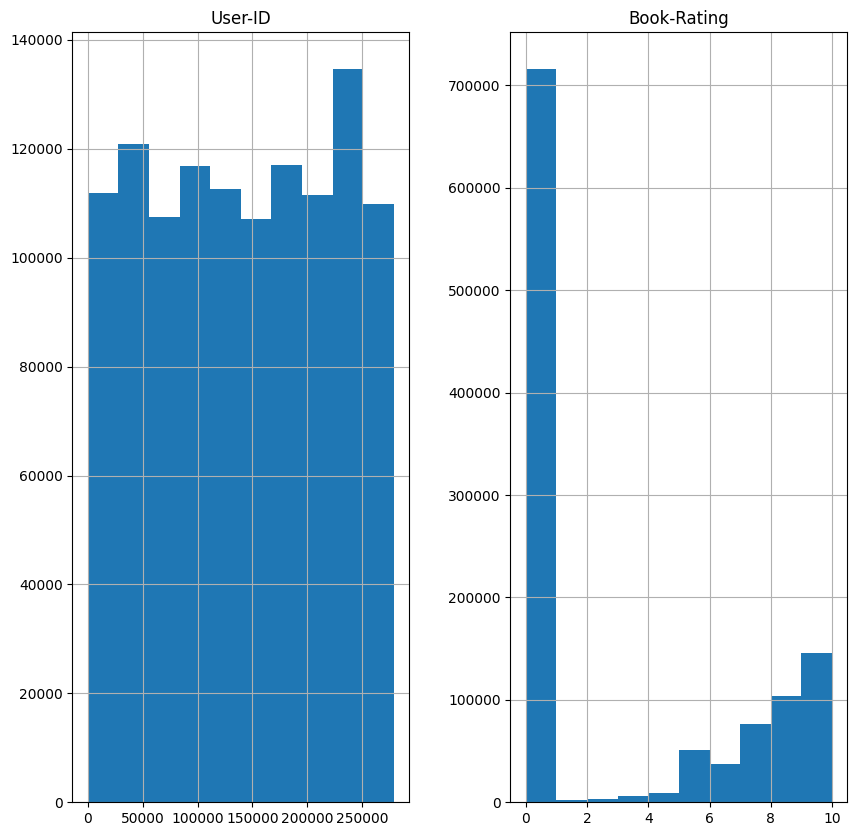

In [16]:
df.hist(figsize=(10,10))
plt.show()

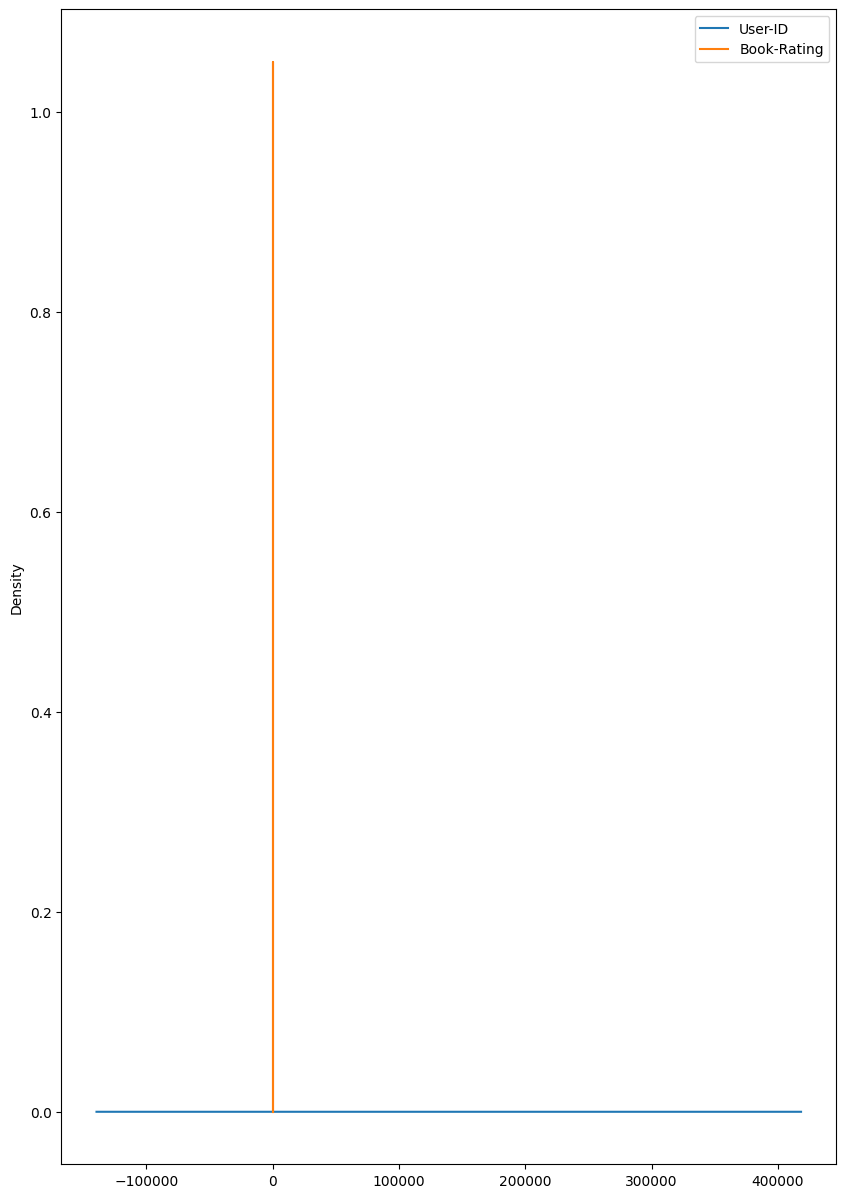

In [17]:
df.plot(kind='density',figsize=(10,15))
plt.show()

In [ ]:
df.plot(kind='kde',figsize=(10,10))#Kernel Density Estimation
plt.show()

In [ ]:
df.dtypes

In [ ]:
df.plot(kind='scatter',x="User-ID",y="Book-Rating",figsize=(10,10))
plt.show()

In [ ]:
df.info()

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
corr_matrix=df[['User-ID','Book-Rating']].corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap='YlOrBr')
plt.show()

Working on user dataset

In [ ]:
df2=pd.read_csv('Users.csv', encoding='latin-1')
df2

In [ ]:
df2.dtypes

In [ ]:
df2.isnull().sum()

In [ ]:
df2.duplicated().sum()

In [ ]:
df2['Age'].fillna(0,inplace=True)
df2

In [ ]:
df2.info()

In [ ]:
df2.describe()

In [ ]:
df2

In [ ]:
df2.plot(kind="box",figsize=(5,5))
plt.show()

In [ ]:
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df2[(df2['Age'] < lower_bound) | (df2['Age'] > upper_bound)]
num_outliers = len(outliers)
print("Number of outliers in 'Age':", num_outliers)


In [ ]:
df2.hist(figsize=(10,10))
plt.show()

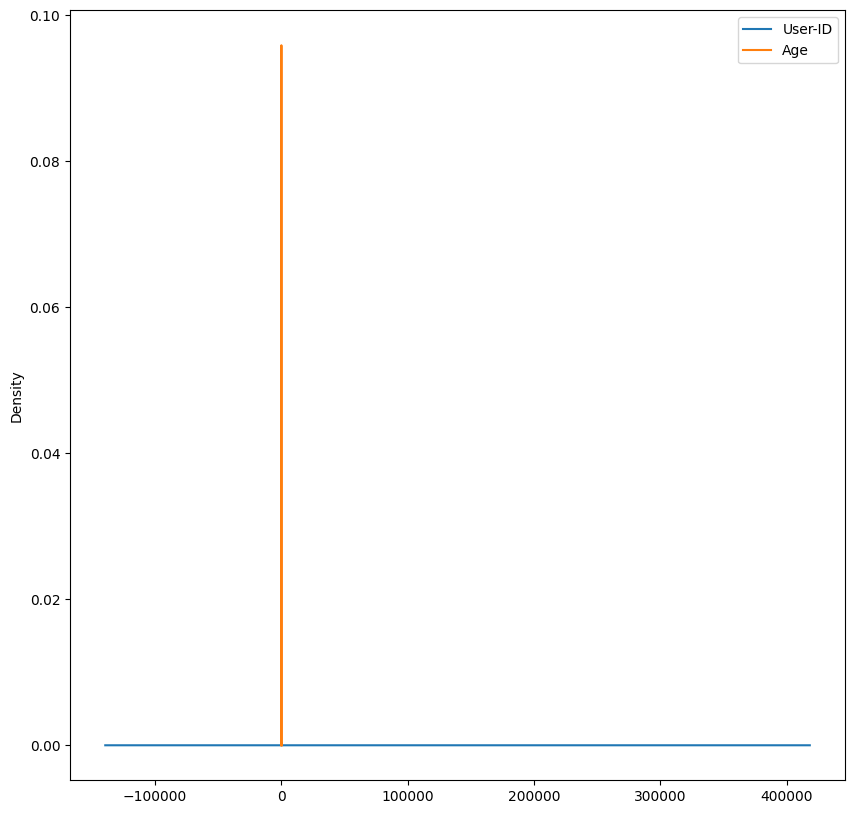

In [ ]:
df2.plot(kind='density',figsize=(10,10))
plt.show()

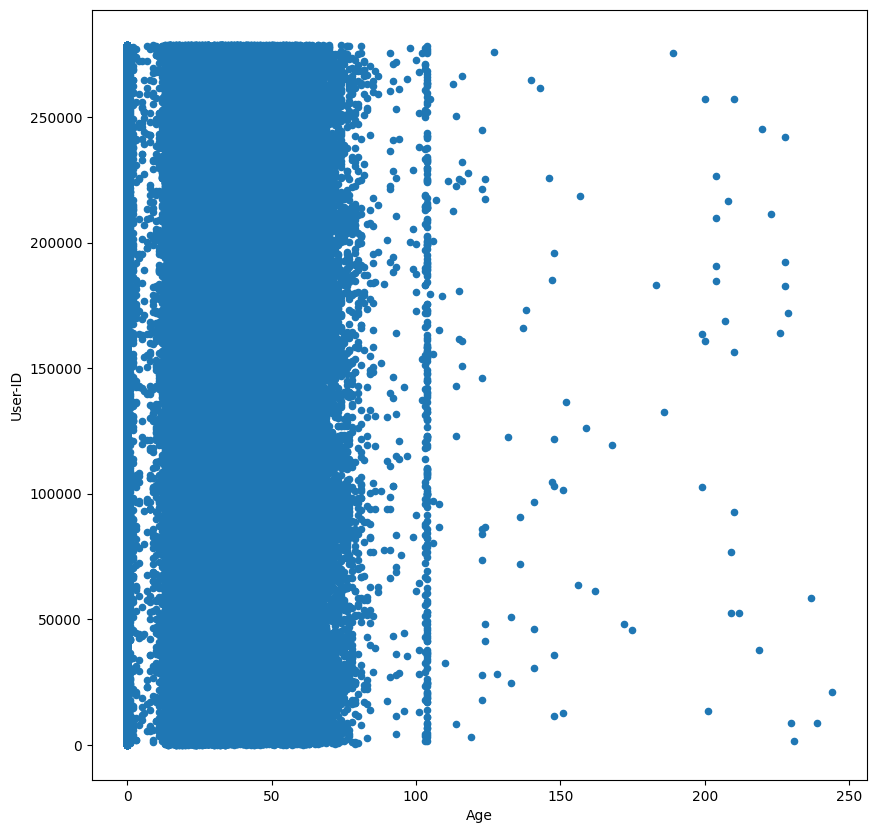

In [ ]:
df2.plot(kind='scatter',x="Age",y="User-ID",figsize=(10,10))
plt.show()

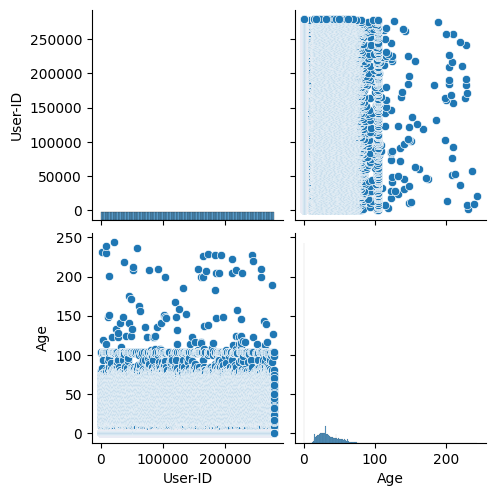

In [ ]:
sns.pairplot(df2)
plt.show()

In [ ]:
corr_matrix1=df2[['User-ID','Age']].corr()
corr_matrix1

,User-ID,Age
User-ID,1.000000,-0.002537
Age,-0.002537,1.000000


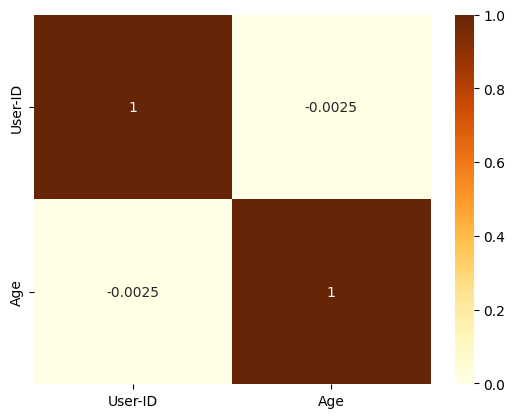

In [ ]:
sns.heatmap(corr_matrix1,annot=True,cmap='YlOrBr')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Worked on user + rating dataset(merged_df)

In [ ]:
merged_df = pd.merge(df, df2, on='User-ID')
merged_df #merged rating and user data frame

,User-ID,ISBN,Book-Rating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",0.0
1,276726,0155061224,5,"seattle, washington, usa",0.0
2,276727,0446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...
1149775,276704,1563526298,9,"cedar park, texas, usa",0.0
1149776,276706,0679447156,0,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,"mannington, west virginia, usa",38.0
1149778,276721,0590442449,10,"providence, rhode island, usa",14.0


In [ ]:
merged_df.describe()

,User-ID,Book-Rating,Age
count,1.149780e+06,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00,2.721572e+01
std,8.056228e+04,3.854184e+00,2.052181e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00,0.000000e+00
50%,1.410100e+05,0.000000e+00,3.000000e+01
75%,2.110280e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,2.440000e+02


In [ ]:
merged_df.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Location,0
Age,0


In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.nunique()

,0
User-ID,105283
ISBN,340556
Book-Rating,11
Location,26111
Age,144


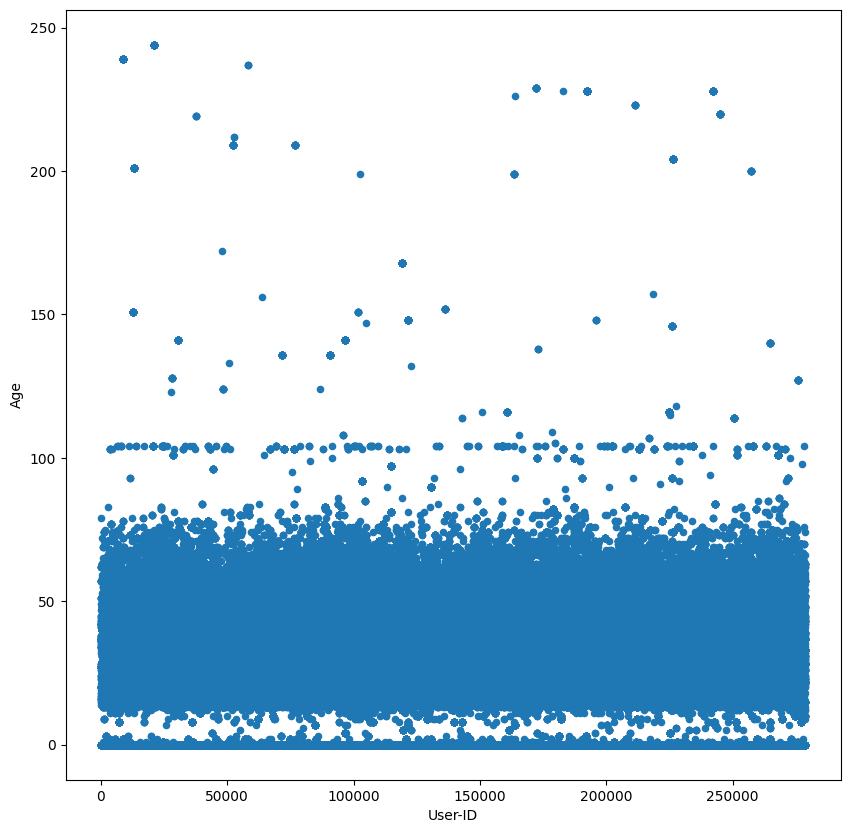

In [ ]:
merged_df.plot(kind='scatter',x='User-ID',y='Age',figsize=(10,10))
plt.show()

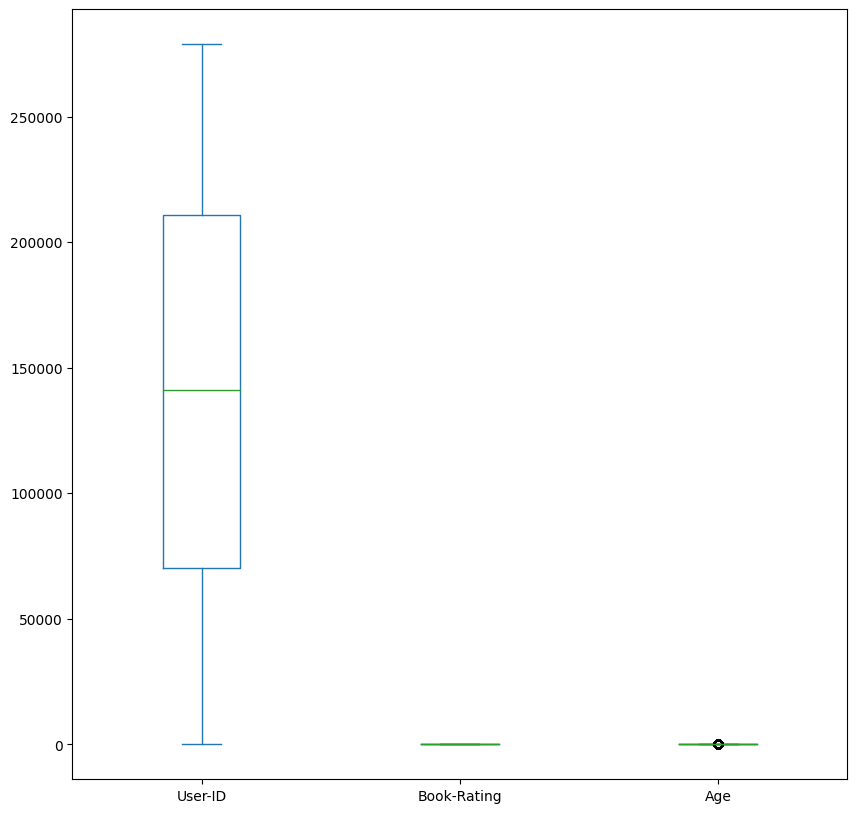

In [ ]:
merged_df.plot(kind="box",figsize=(10,10))
plt.show()

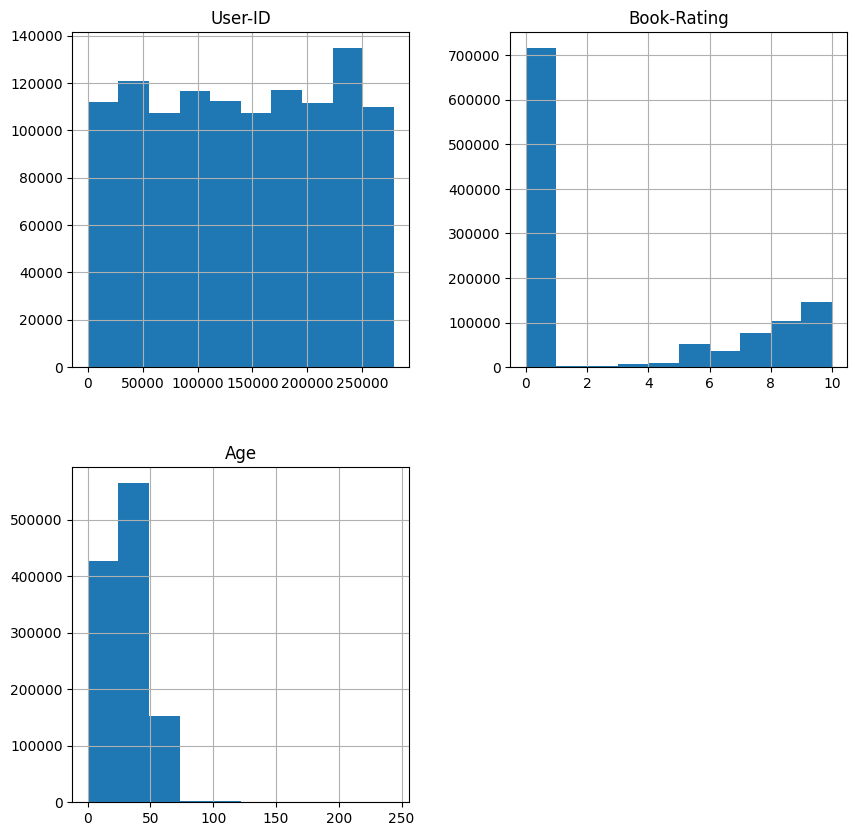

In [ ]:
merged_df.hist(figsize=(10,10))
plt.show()

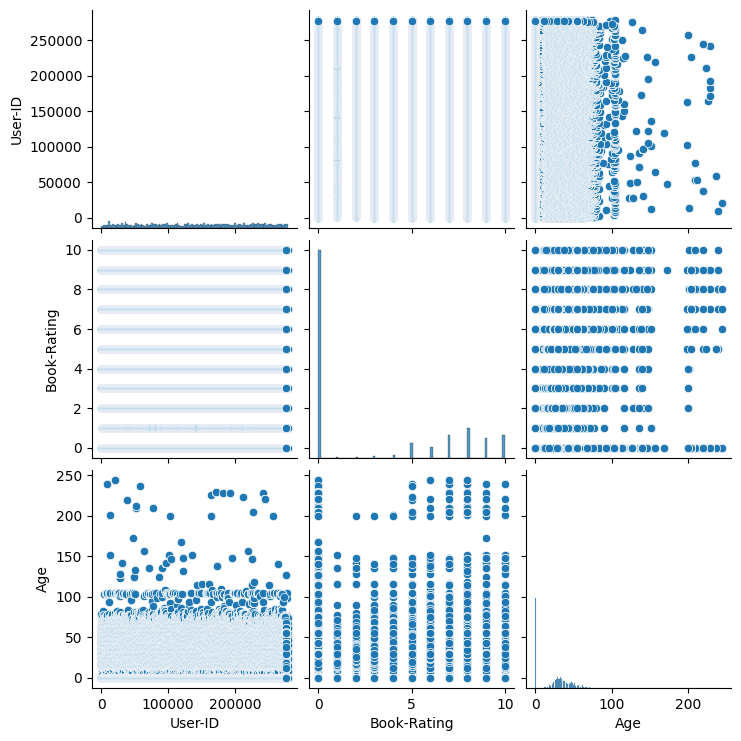

In [ ]:
sns.pairplot(merged_df)
plt.show()

In [ ]:
numeric_columns = merged_df.select_dtypes(include=[np.number])
numeric_columns

,User-ID,Book-Rating,Age
0,276725,0,0.0
1,276726,5,0.0
2,276727,0,16.0
3,276729,3,16.0
4,276729,6,16.0
...,...,...,...
1149775,276704,9,0.0
1149776,276706,0,18.0
1149777,276709,10,38.0
1149778,276721,10,14.0


In [ ]:
corr_matrics2=numeric_columns.corr()
corr_matrics2

,User-ID,Book-Rating,Age
User-ID,1.000000,-0.046944,0.010300
Book-Rating,-0.046944,1.000000,-0.037459
Age,0.010300,-0.037459,1.000000


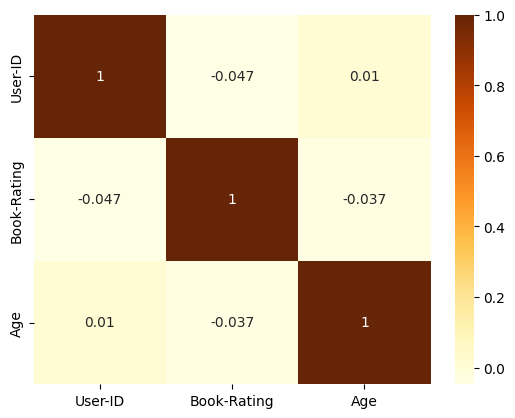

In [ ]:
sns.heatmap(corr_matrics2,annot=True,cmap='YlOrBr')
plt.show()

Worked on User + Rating + Book as Combined data set

In [ ]:
df1=pd.read_csv('Books.csv', encoding='latin-1')
df1

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
...,...,...,...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...,http://images.amazon.com/images/P/0440400988.0...
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...,http://images.amazon.com/images/P/0525447644.0...
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...,http://images.amazon.com/images/P/006008667X.0...
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...,http://images.amazon.com/images/P/0192126040.0...


In [ ]:
df1 = df1.iloc[:, :-3]
df1


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,0525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,0192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [ ]:
combined_dfs=pd.merge(merged_df,df1,on='ISBN')
combined_dfs #merged_df(user+rating)+ df1(Books)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,"seattle, washington, usa",0.0,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
...,...,...,...,...,...,...,...,...,...
1031131,276704,0876044011,0,"cedar park, texas, usa",0.0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998,A.R.E. Press (Association of Research &amp; Enlig
1031132,276704,1563526298,9,"cedar park, texas, usa",0.0,Get Clark Smart : The Ultimate Guide for the S...,Clark Howard,2000,Longstreet Press
1031133,276706,0679447156,0,"quebec, quebec, canada",18.0,Eight Weeks to Optimum Health: A Proven Progra...,Andrew Weil,1997,Alfred A. Knopf
1031134,276709,0515107662,10,"mannington, west virginia, usa",38.0,The Sherbrooke Bride (Bride Trilogy (Paperback)),Catherine Coulter,1996,Jove Books


In [ ]:
combined_dfs.describe()

,User-ID,Book-Rating,Age
count,1.031136e+06,1.031136e+06,1.031136e+06
mean,1.405945e+05,2.839051e+00,2.732102e+01
std,8.052466e+04,3.854157e+00,2.050633e+01
min,2.000000e+00,0.000000e+00,0.000000e+00
25%,7.041500e+04,0.000000e+00,0.000000e+00
50%,1.412100e+05,0.000000e+00,3.000000e+01
75%,2.114260e+05,7.000000e+00,4.100000e+01
max,2.788540e+05,1.000000e+01,2.440000e+02


In [ ]:
combined_dfs.dtypes

,0
User-ID,int64
ISBN,object
Book-Rating,int64
Location,object
Age,float64
Book-Title,object
Book-Author,object
Year-Of-Publication,object
Publisher,object


In [ ]:
combined_dfs.loc[combined_dfs['Age'] >= 100, 'Age'] = 100

In [ ]:
combined_dfs.head(30)

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,276726,0155061224,5,"seattle, washington, usa",0.0,Rites of Passage,Judith Rae,2001,Heinle
2,276727,0446520802,0,"h, new south wales, australia",16.0,The Notebook,Nicholas Sparks,1996,Warner Books
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
4,276729,0521795028,6,"rijeka, n/a, croatia",16.0,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
5,276733,2080674722,0,"paris, n/a, france",37.0,Les Particules Elementaires,Michel Houellebecq,1998,Flammarion
6,276744,038550120X,7,"torrance, california, usa",0.0,A Painted House,JOHN GRISHAM,2001,Doubleday
7,276746,0425115801,0,"fort worth, ,",0.0,Lightning,Dean R. Koontz,1996,Berkley Publishing Group
8,276746,0449006522,0,"fort worth, ,",0.0,Manhattan Hunt Club,JOHN SAUL,2002,Ballantine Books
9,276746,0553561618,0,"fort worth, ,",0.0,Dark Paradise,TAMI HOAG,1994,Bantam


In [ ]:
combined_dfs.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Location,0
Age,0
Book-Title,0
Book-Author,2
Year-Of-Publication,0
Publisher,2


In [ ]:
combined_dfs.fillna(0,inplace=True)


In [ ]:
combined_dfs.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0
Location,0
Age,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0


In [ ]:
combined_dfs.duplicated().sum()

0

In [ ]:
combined_dfs.nunique()

,0
User-ID,92106
ISBN,270151
Book-Rating,11
Location,22480
Age,98
Book-Title,241071
Book-Author,101588
Year-Of-Publication,202
Publisher,16730


In [ ]:
unique_age=combined_dfs['Age'].unique()
print(unique_age)

[  0.  16.  37.  25.  39.  19.  32.  28.  18.  34.  21.  31.  23.  14.
  29.  11.  22.  27.  41.  17.  43.  20.  26.  10.  35.  24.  36.  46.
  30.  60.  57.  70.  54.  45.  40.  47.  42.  44.   8.  65.  62.  53.
  33.  49.  63.  15.  67.  48.  56.  50.  52.  98.  66.  38.  51.   2.
  55.  64.  59.  61. 100.  13.  12.  74.  58.   9.  72.  69.  71.  75.
   3.   1.  83.  68.  77.  73.  76.  78.  93.  79.  80.  82.   7.  81.
  84.   4.  96.   5.  95.  89.  92.  85.  90.  97.  86.  99.   6.  94.]


In [ ]:
unique_ratings = combined_dfs['Book-Rating'].unique()
print(unique_ratings) #Book-Rating

[ 0  5  3  6  7  9  8 10  1  4  2]


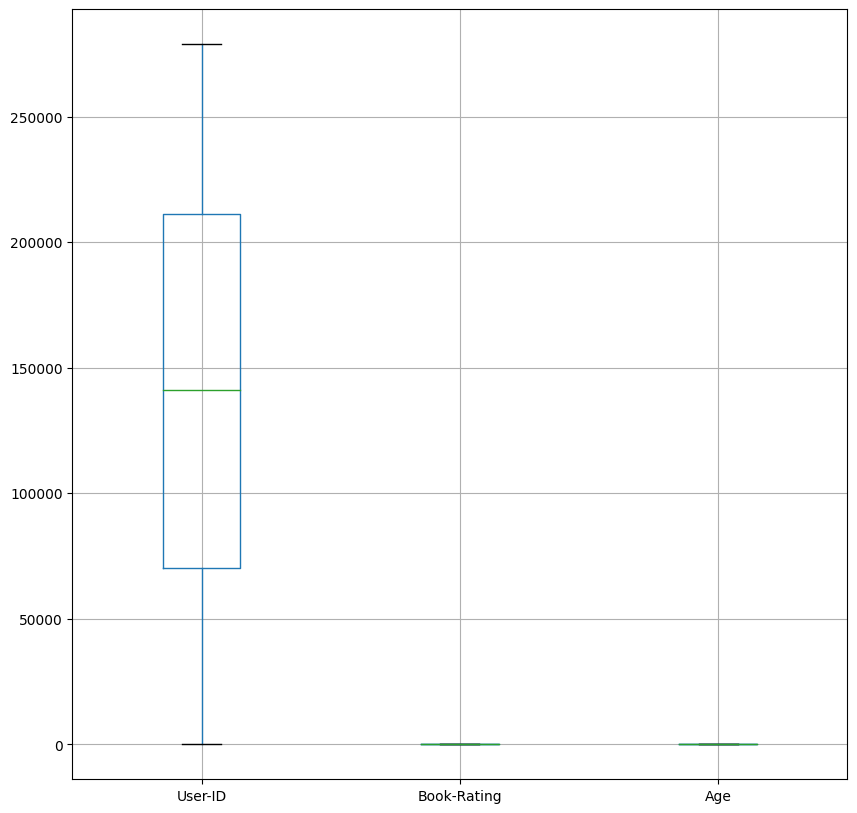

In [ ]:
combined_dfs.boxplot(figsize=(10,10))
plt.show()

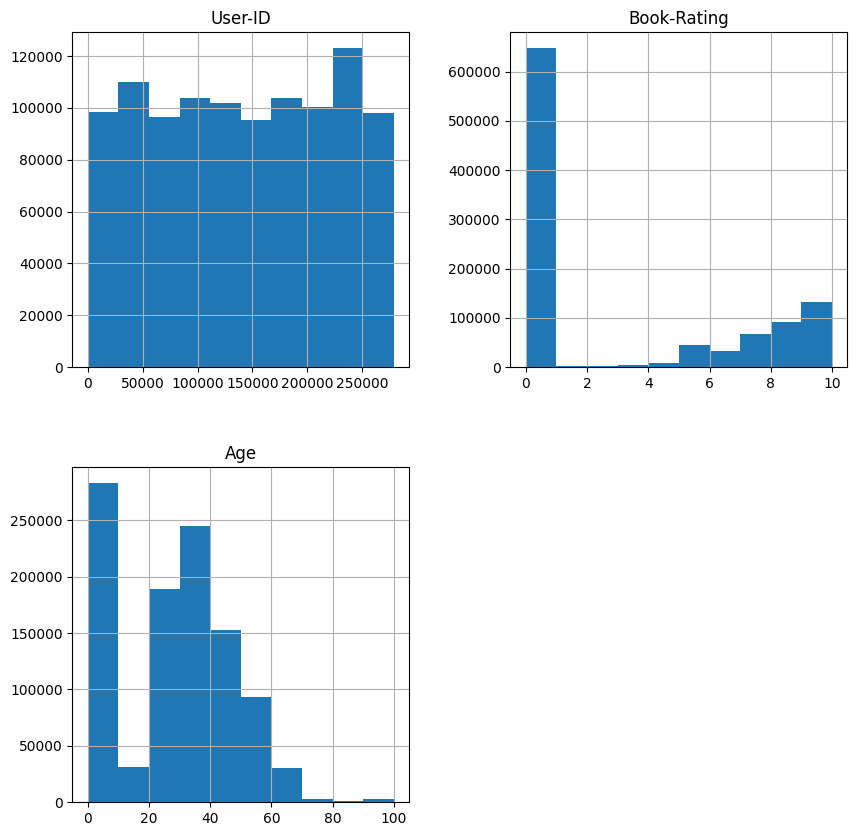

In [ ]:
combined_dfs.hist(figsize=(10,10))
plt.show()

In [ ]:
Q1_age = combined_dfs['Age'].quantile(0.25)
Q3_age = combined_dfs['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

outliers_age = combined_dfs[(combined_dfs['Age'] < lower_bound_age) | (combined_dfs['Age'] > upper_bound_age)]
num_outliers_age = len(outliers_age)
print("Number of outliers in 'Age':", num_outliers_age)





Number of outliers in 'Age': 0


In [ ]:
combined_dfs.plot(kind='density',figsize=(20,15))
plt.show()

In [ ]:
sns.pairplot(combined_dfs)
plt.show()

In [ ]:
combined_dfs.dtypes

In [ ]:
combined_dfs.head(30)

In [ ]:
sns.pairplot(combined_dfs)
plt.show()

In [ ]:
combined_dfs.dtypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
combined_dfs['ISBN'] = le.fit_transform(combined_dfs['ISBN'])
combined_dfs['Location'] = le.fit_transform(combined_dfs['Location'])
combined_dfs['Book-Author'] = le.fit_transform(combined_dfs['Book-Author'].astype(str))
combined_dfs['Publisher'] = le.fit_transform(combined_dfs['Publisher'].astype(str))
combined_dfs['Book-Title'] = le.fit_transform(combined_dfs['Book-Title'].astype(str))
combined_dfs['Year-Of-Publication'] = le.fit_transform(combined_dfs['Year-Of-Publication'].astype(str))
combined_dfs

In [ ]:
combined_dfs.dtypes

In [ ]:
combined_dfs.isnull().sum()

In [ ]:
combined_dfs.duplicated().sum()

In [ ]:
combined_dfs.nunique()

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()

# Select numerical features to standardize
numerical_features = ['User-ID', 'Book-Rating', 'Age', 'ISBN', 'Year-Of-Publication']

# Fit and transform the scaler on the selected features
combined_dfs[numerical_features] = scaler.fit_transform(combined_dfs[numerical_features])

# Display the standardized dataframe
combined_dfs.head()


In [ ]:
combined_dfs.hist(figsize=(10,10))
plt.show()

In [ ]:
combined_dfs.boxplot(figsize=(20,20))
plt.show()

In [ ]:
corr_matrix=combined_dfs.corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix,annot=True,cmap='YlOrBr')
plt.show()

In [ ]:
combined_dfs.plot(kind='scatter',x='Book-Rating',y='Book-Author')
plt.show()

In [ ]:
a = combined_dfs.head(10000)
a.plot(kind='scatter',x='Book-Rating',y='Book-Author')
plt.show()

In [ ]:
sns.pairplot(a)
plt.show()

In [ ]:
a.plot(kind='kde',figsize=(10,10))
plt.show()

#Model building

User-Based Collaborative Filtering

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

user_sim_matrix = cosine_similarity(combined_dfs)
user_sim_df = pd.DataFrame(user_sim_matrix, index=combined_dfs.index, columns=combined_dfs.index)

def get_user_based_recommendations(user_id, n_recommendations=5):
    similar_users = user_sim_df[user_id].sort_values(ascending=False).index[1:]
    similar_user_interactions =combined_dfs.loc[similar_users].mean()
    user_interactions = combine_dfs.loc[user_id]
    recommendations = similar_user_interactions[user_interactions.isna()].sort_values(ascending=False)
    return recommendations.head(n_recommendations)

Item-Based Collaborative Filtering

In [ ]:

item_sim_matrix = cosine_similarity(combined_dfs.T)
item_sim_df = pd.DataFrame(item_sim_matrix, index=combined_dfs.columns, columns=combined_dfs.columns)

def get_item_based_recommendations(user_id, n_recommendations=5):
    user_interactions = combined_dfs.loc[user_id].dropna()
    scores = user_interactions.dot(item_sim_df)
    recommendations = scores[user_interactions.index.isna()].sort_values(ascending=False)
    return recommendations.head(n_recommendations)

K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import NearestNeighbors

knn_model = NearestNeighbors(metric='cosine', algorithm='brute')
knn_model.fit(combined_dfs.T)

def get_knn_recommendations(user_id, combined_dfs, knn_model, n_recommendations=5):
    user_interactions = combined_dfs.loc[user_id].dropna().index
    distances, indices = knn_model.kneighbors([df.loc[user_id]], n_neighbors=n_recommendations+1)
    recommendations = [combined_dfs.columns[i] for i in indices.flatten()[1:]]
    return recommendations